In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
39424,57.153153153153156,24.88129122711757,2024-11-26 13:53:53
39425,56.93693693693694,24.1424001912648,2024-11-26 13:55:53
39426,56.972999572753906,24.132699966430664,2024-11-26 13:59:03
39427,56.9734347,24.1350446,2024-11-26 14:00:02


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
39424,57.153153153153156,24.88129122711757,2024-11-26 13:53:53,2024-11-26 13
39425,56.93693693693694,24.1424001912648,2024-11-26 13:55:53,2024-11-26 13
39426,56.972999572753906,24.132699966430664,2024-11-26 13:59:03,2024-11-26 13
39427,56.9734347,24.1350446,2024-11-26 14:00:02,2024-11-26 14


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

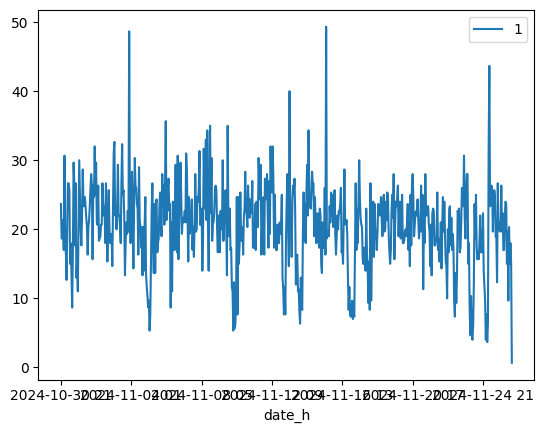

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


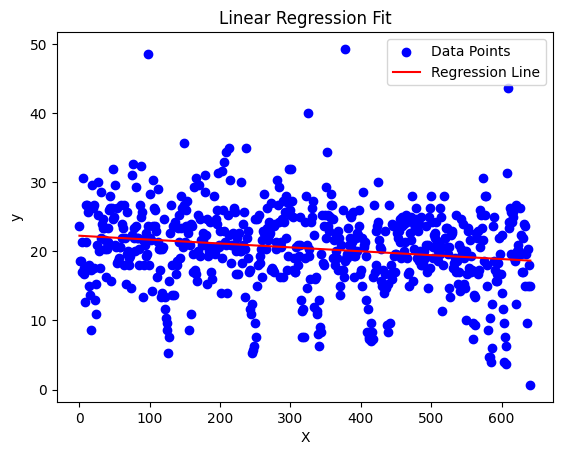

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[22.27428865],
       [22.26866517],
       [22.26304168],
       [22.2574182 ],
       [22.25179472],
       [22.24617124],
       [22.24054776],
       [22.23492427],
       [22.22930079],
       [22.22367731],
       [22.21805383],
       [22.21243035],
       [22.20680686],
       [22.20118338],
       [22.1955599 ],
       [22.18993642],
       [22.18431293],
       [22.17868945],
       [22.17306597],
       [22.16744249],
       [22.16181901],
       [22.15619552],
       [22.15057204],
       [22.14494856],
       [22.13932508],
       [22.13370159],
       [22.12807811],
       [22.12245463],
       [22.11683115],
       [22.11120767],
       [22.10558418],
       [22.0999607 ],
       [22.09433722],
       [22.08871374],
       [22.08309026],
       [22.07746677],
       [22.07184329],
       [22.06621981],
       [22.06059633],
       [22.05497284],
       [22.04934936],
       [22.04372588],
       [22.0381024 ],
       [22.03247892],
       [22.02685543],
       [22